In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno
from collections import defaultdict
%matplotlib inline

In [2]:
df = pd.read_csv('Magicbreaks_cleaned_2.0.csv',index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1259 non-null   int64  
 3   Furnishing   1259 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1259 non-null   int64  
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1259 non-null   object 
 10  Area_log     1259 non-null   float64
 11  Price_log    1259 non-null   float64
 12  loc_updated  1259 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 137.7+ KB


In [109]:
cols_in_use = ['BHK', 'Bathroom', 'Furnishing', 'Parking', 'Status', 'Transaction', 'Type', 'Area_log','Price_log','loc_updated']
#cols_in_use = ['BHK', 'Bathroom', 'Furnishing', 'Parking', 'Status', 'Transaction', 'Type','Area','Price','loc_updated']
df_new = df[cols_in_use]

In [110]:
cat_cols = ['Furnishing','Status','Transaction','Type','loc_updated']
df_one_hot = pd.get_dummies(df_new, columns=cat_cols)
df_one_hot.shape

(1259, 46)

In [111]:
y = df_one_hot['Price_log']
x = df_one_hot.drop('Price_log',axis=1)
# y = df_one_hot['Price']
# x = df_one_hot.drop('Price',axis=1)

In [112]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.25)

In [113]:
from sklearn import metrics
def fit_to_model(x,y,xt,algo):
    model = algo()
    model.fit(x,y)
    pred = model.predict(xt)
    r2 = metrics.r2_score(y_test, pred)
    return pred,r2

R2 score:  0.8501389370274999


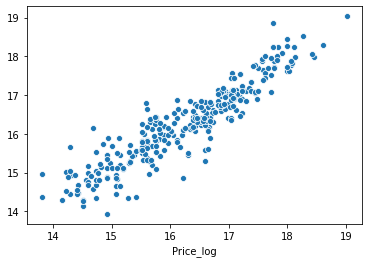

In [114]:
from sklearn.linear_model import LinearRegression
pred,r2 = fit_to_model(x_train,y_train,x_test,LinearRegression)
print('R2 score: ', r2)
sns.scatterplot(y_test,pred)

R2 score:  0.8114511391156871


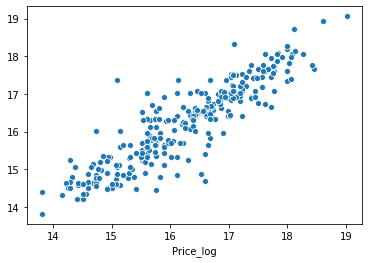

In [115]:
from sklearn.tree import DecisionTreeRegressor
pred,r2 = fit_to_model(x_train,y_train,x_test,DecisionTreeRegressor)
print('R2 score: ', r2)
sns.scatterplot(y_test,pred)

R2 score:  0.8462377415054713


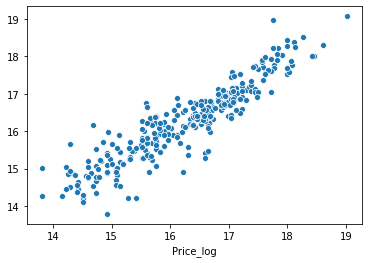

In [116]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(40,15),max_iter=500)
model.fit(x_train,y_train)
pred = model.predict(x_test)
r2 = metrics.r2_score(y_test, pred)
print('R2 score: ', r2)
sns.scatterplot(y_test,pred)